In [ ]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"


import numpy as np
import os

np.random.seed(42)


import matplotlib as mpl
import matplotlib.pyplot as plt

Regression

In [ ]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

plotting the dataset

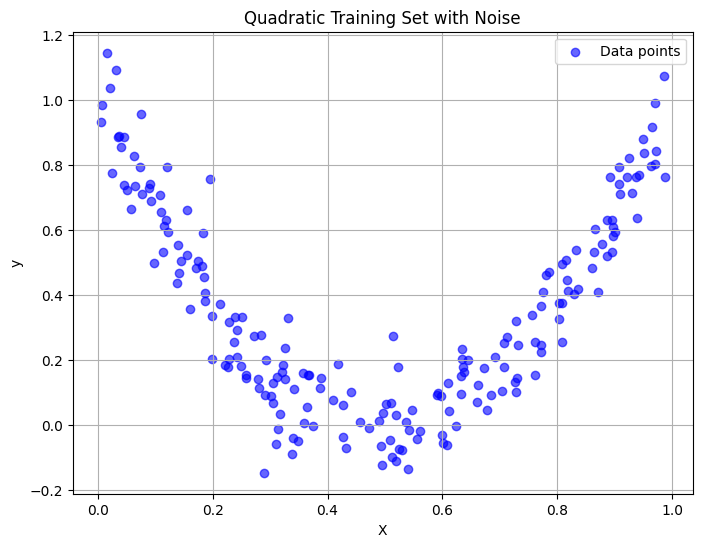

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', marker='o', alpha=0.6, label='Data points')
plt.title('Quadratic Training Set with Noise')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

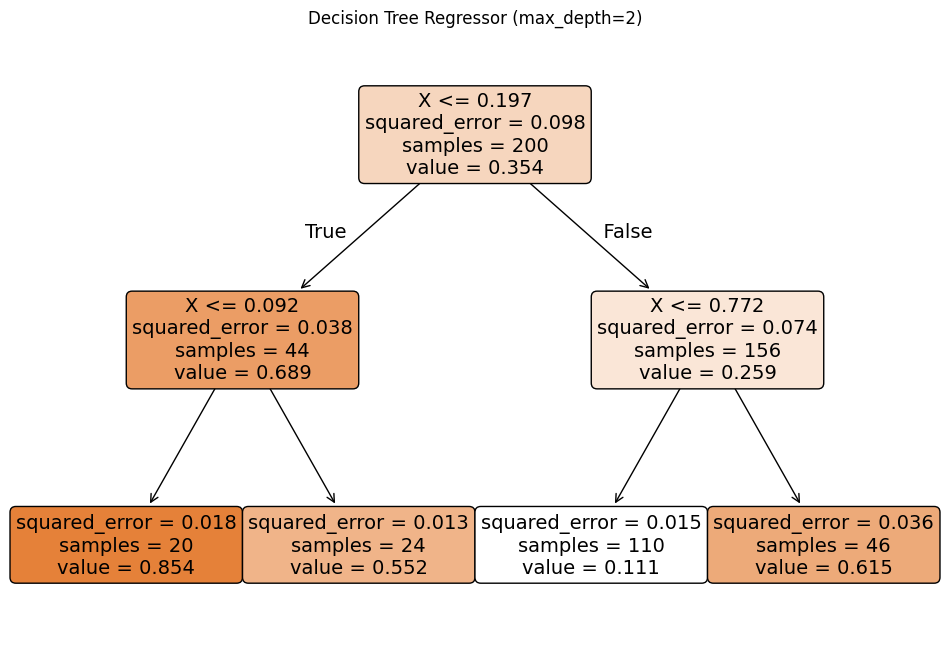

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(tree_reg, feature_names=['X'], filled=True, rounded=True)
plt.title('Decision Tree Regressor (max_depth=2)')
plt.show()

Visualizing the tree prediction ..depth=2

Text(0.5, 1.0, 'max_depth=2')

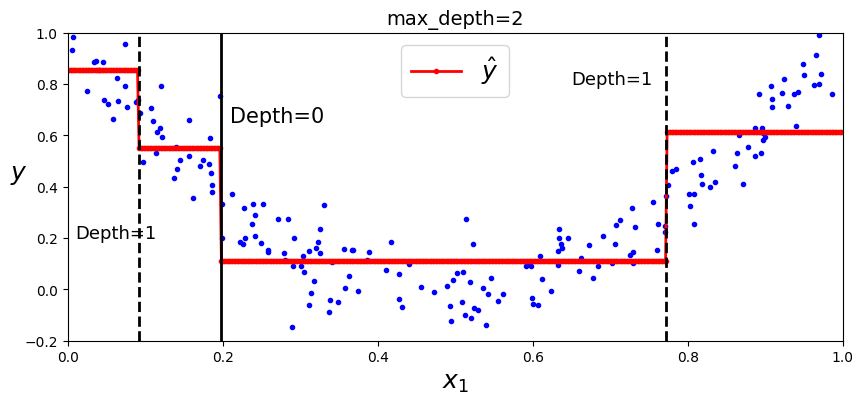

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg1.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=1, figsize=(10, 4), sharey=True)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

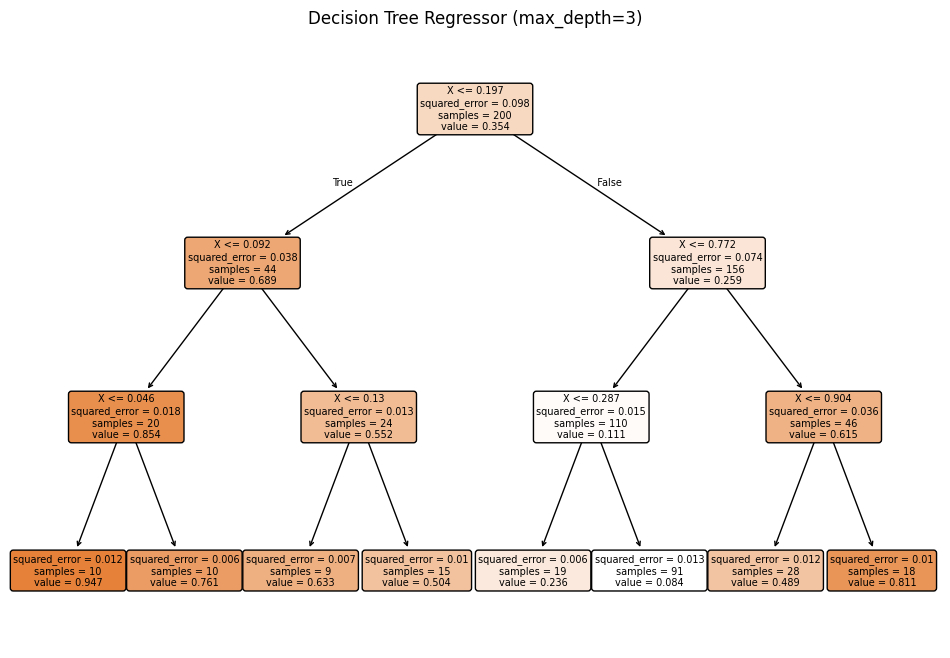

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(tree_reg, feature_names=['X'], filled=True, rounded=True)
plt.title('Decision Tree Regressor (max_depth=3)')
plt.show()

Visualizing the tree .. depth =3

Text(0.5, 1.0, 'max_depth=3')

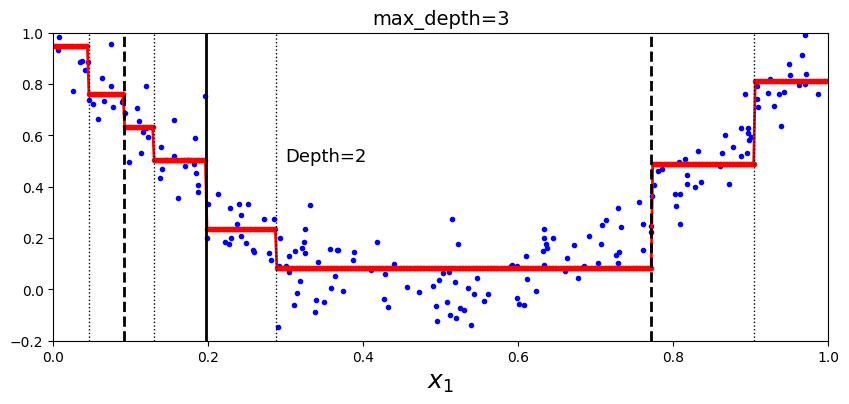

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=1, figsize=(10, 4), sharey=True)

plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

comparing depth=2 and depth=3

Text(0.5, 1.0, 'max_depth=3')

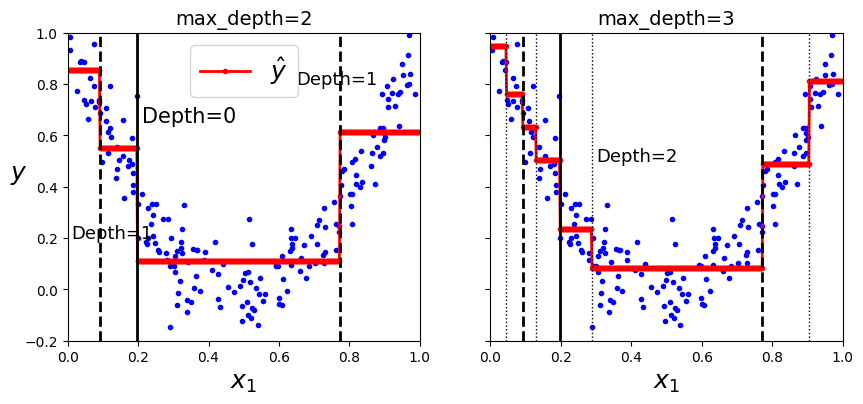

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)


without regularization

Text(0.5, 1.0, 'No restrictions')

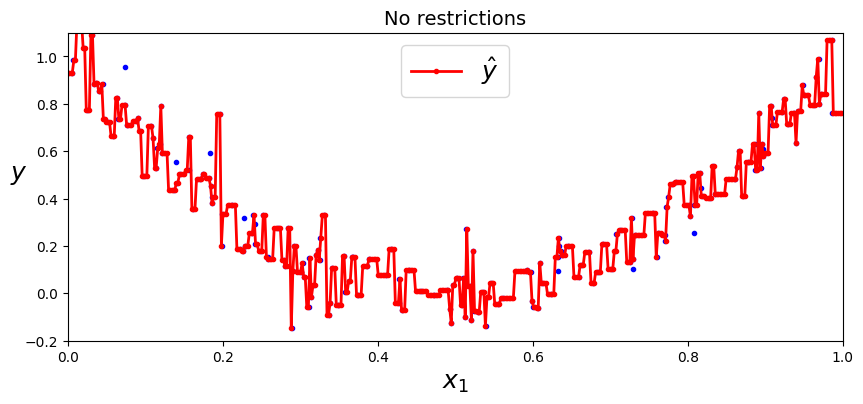

In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg1.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=1, figsize=(10, 4), sharey=True)

plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)



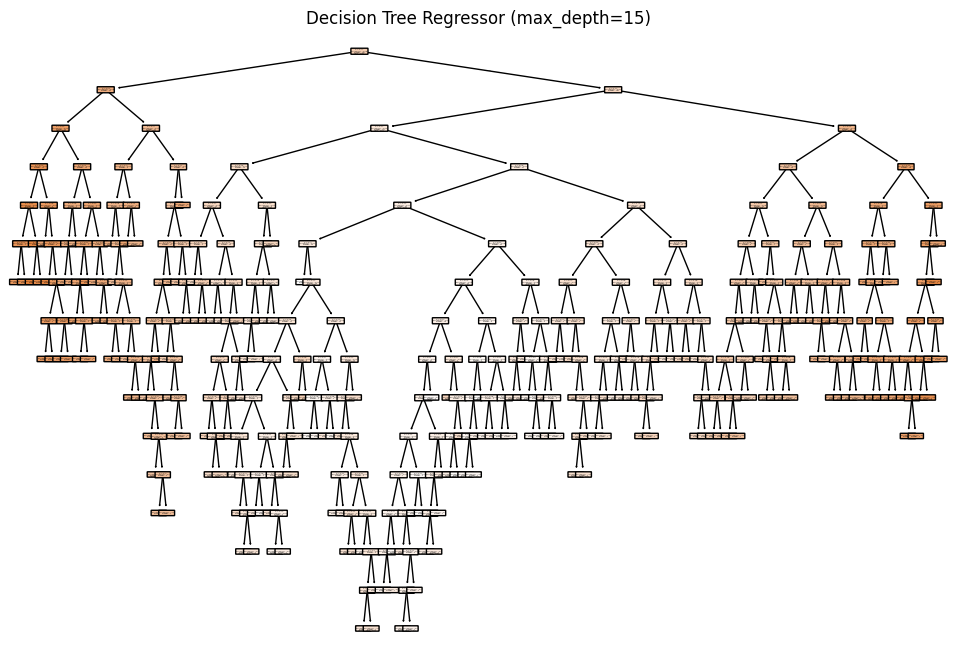

In [ ]:
tree_depth = tree_reg1.get_depth()
plt.figure(figsize=(12, 8))
plot_tree(tree_reg1, feature_names=['X'], filled=True, rounded=True)
plt.title(f'Decision Tree Regressor (max_depth={tree_depth})')
plt.show()

with regularization

Text(0.5, 1.0, 'min_samples_leaf=10')

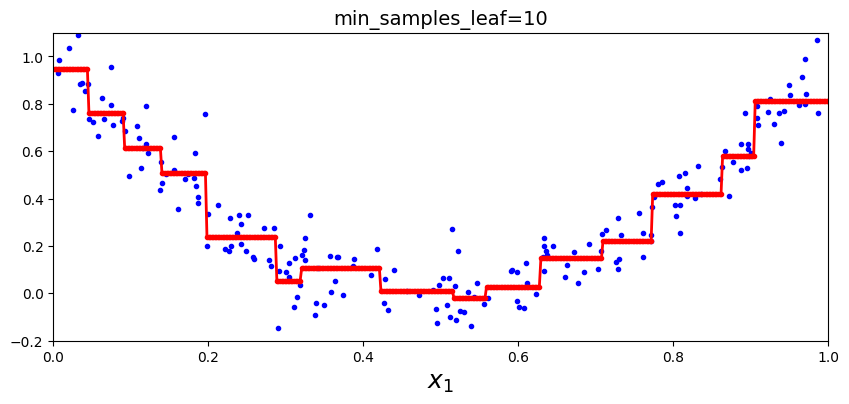

In [ ]:
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=1, figsize=(10, 4), sharey=True)


plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)


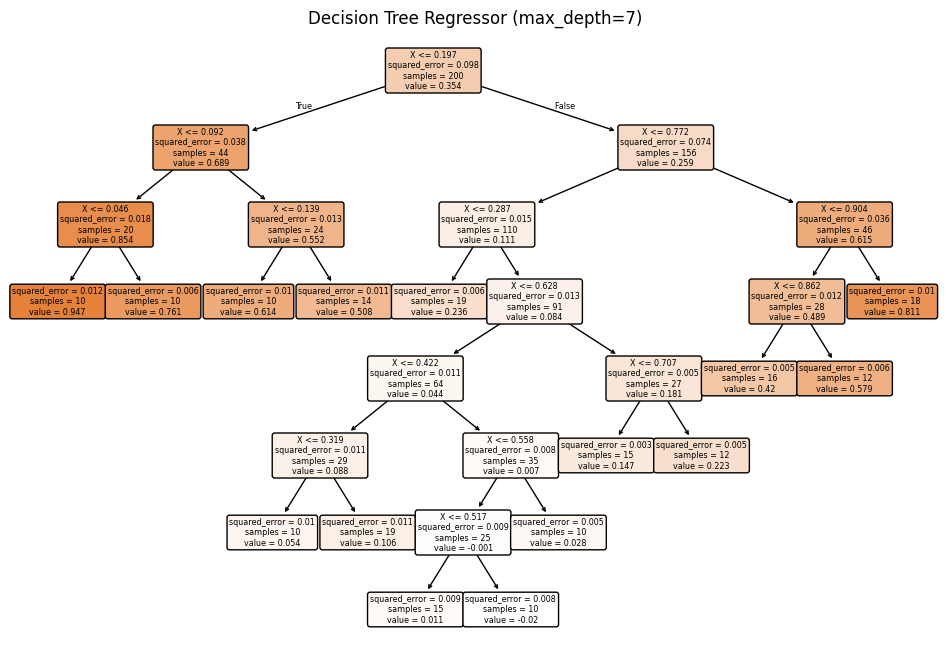

In [ ]:
tree_depth = tree_reg2.get_depth()
plt.figure(figsize=(12, 8))
plot_tree(tree_reg2, feature_names=['X'], filled=True, rounded=True)
plt.title(f'Decision Tree Regressor (max_depth={tree_depth})')
plt.show()

regularization effect

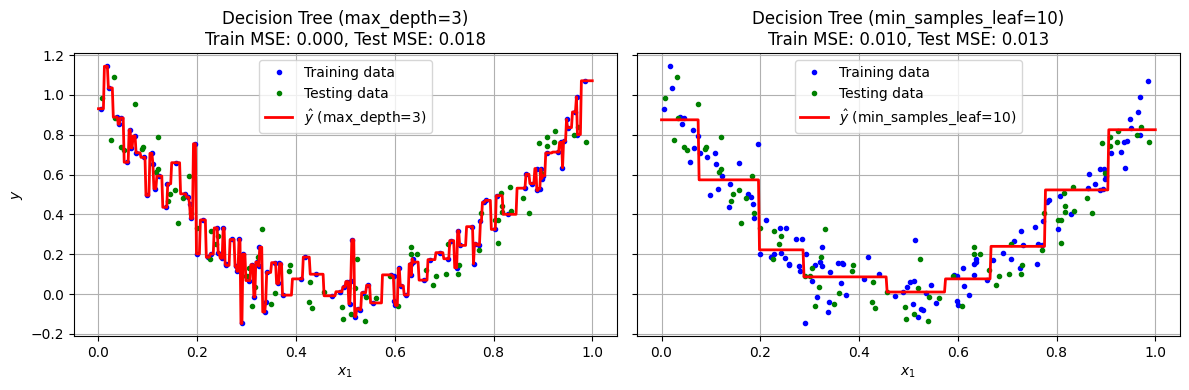

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate the dataset
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

# Split the dataset into training and testing sets (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train the decision tree regressors
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg1.fit(X_train, y_train)

tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg2.fit(X_train, y_train)

# Predict using the trained models
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

# Evaluate the models
y_train_pred1 = tree_reg1.predict(X_train)
y_test_pred1 = tree_reg1.predict(X_test)

y_train_pred2 = tree_reg2.predict(X_train)
y_test_pred2 = tree_reg2.predict(X_test)

train_mse1 = mean_squared_error(y_train, y_train_pred1)
test_mse1 = mean_squared_error(y_test, y_test_pred1)

train_mse2 = mean_squared_error(y_train, y_train_pred2)
test_mse2 = mean_squared_error(y_test, y_test_pred2)

# Plot the results
fig, axes = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)

axes[0].plot(X_train, y_train, "b.", label="Training data")
axes[0].plot(X_test, y_test, "g.", label="Testing data")
axes[0].plot(x1, y_pred1, "r-", linewidth=2, label=r"$\hat{y}$ (max_depth=3)")
axes[0].set_title(f"Decision Tree (max_depth=3)\nTrain MSE: {train_mse1:.3f}, Test MSE: {test_mse1:.3f}")
axes[0].set_xlabel("$x_1$")
axes[0].set_ylabel("$y$")
axes[0].legend()
axes[0].grid(True)

axes[1].plot(X_train, y_train, "b.", label="Training data")
axes[1].plot(X_test, y_test, "g.", label="Testing data")
axes[1].plot(x1, y_pred2, "r-", linewidth=2, label=r"$\hat{y}$ (min_samples_leaf=10)")
axes[1].set_title(f"Decision Tree (min_samples_leaf=10)\nTrain MSE: {train_mse2:.3f}, Test MSE: {test_mse2:.3f}")
axes[1].set_xlabel("$x_1$")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()
